### predict califonia housing price

##### predict the house price on the several independent variabke
##### data used califonia housing dataset

In [24]:
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [25]:
from sklearn.datasets import fetch_california_housing

In [26]:
housing =fetch_california_housing()

In [27]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Exploratory Data Aalysis(EDA)

In [28]:
features = pd.DataFrame(housing.data,columns= housing.feature_names)
features.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [29]:
target = pd.Series(housing.target)
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Length: 20640, dtype: float64

In [30]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [31]:
# splitting the dataset

from sklearn.model_selection import train_test_split
x_train_full, x_test,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=4)
x_train,x_valid,y_train,yvalis = train_test_split(x_train_full,y_train_full,random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train = scaler.fit_transform(x_train)
x_valid= scaler.transform(x_valid)
x_test = scaler.transform(x_test)


In [33]:
# we set the random seeds,this is to generate the same result every time we run this model
np.random.seed(42)
tf.random.set_seed(42)


In [34]:
x_train.shape

(11610, 8)

In [35]:
# Building the model 
model = keras.models.Sequential([keras.layers.Dense(30,activation ='relu',input_shape=x_train.shape[1:]),
                                 keras.layers.Dense(30,activation = 'relu'),
                                 keras.layers.Dense(1)
    
])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 30)                930       
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(loss='mean_squared_error',
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=['mae'])

C:\Users\user\anaconda3\envs\AI\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [38]:
model_history = model.fit(x_train,y_train, epochs=20,validation_data=(x_valid,yvalis))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8674 - mae: 0.9958 - val_loss: 0.8135 - val_mae: 0.6553
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6710 - mae: 0.6116 - val_loss: 0.6361 - val_mae: 0.5744
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6029 - mae: 0.5653 - val_loss: 0.5960 - val_mae: 0.5506
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5685 - mae: 0.5445 - val_loss: 0.5672 - val_mae: 0.5374
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5424 - mae: 0.5310 - val_loss: 0.5436 - val_mae: 0.5257
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5218 - mae: 0.5199 - val_loss: 0.5273 - val_mae: 0.5171
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5051 - mae: 0.5104 - val_loss: 0.5096 - val_mae: 0.5083
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.

In [39]:
mae_test = model.evaluate(x_test,y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.4441 - mae: 0.4743


In [40]:
model_history.history

{'loss': [1.867393970489502,
  0.671043336391449,
  0.6028531193733215,
  0.5685424208641052,
  0.5423721075057983,
  0.5217810273170471,
  0.5050762295722961,
  0.49257588386535645,
  0.4812224507331848,
  0.4723827838897705,
  0.46528515219688416,
  0.4585268795490265,
  0.45269811153411865,
  0.44800254702568054,
  0.44378024339675903,
  0.4397803843021393,
  0.4358627200126648,
  0.4331270456314087,
  0.4306023120880127,
  0.42729243636131287],
 'mae': [0.9958456158638,
  0.611578106880188,
  0.5652503371238708,
  0.5444821119308472,
  0.5310387015342712,
  0.5199431777000427,
  0.5103685259819031,
  0.5031647682189941,
  0.49770209193229675,
  0.4933547377586365,
  0.4885002076625824,
  0.48555994033813477,
  0.48317545652389526,
  0.47978729009628296,
  0.47807788848876953,
  0.47609812021255493,
  0.4742852747440338,
  0.47202080488204956,
  0.4706101715564728,
  0.4690026342868805],
 'val_loss': [0.8134847283363342,
  0.6361409425735474,
  0.596026599407196,
  0.567223668098449

<function matplotlib.pyplot.show(close=None, block=None)>

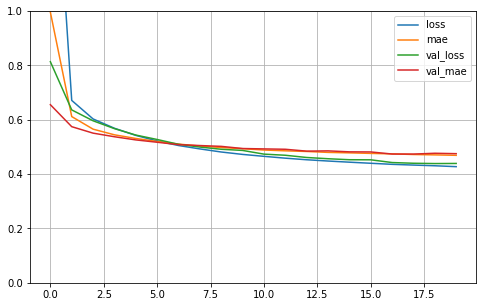

In [41]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

plt.show

In [43]:
x_new =x_test[:3]
y_pred=model.predict(x_new)
print(y_pred)

[[1.7023821]
 [2.6205478]
 [1.3669058]]


In [ ]:
del model

In [ ]:
keras.backend.clear_session()